In [1]:
# 단어를 고차원 벡터로 표현하는 기술
# Glove(Global Vectors for Word Rpresentation)  사전 학습된 단어벡터
# 단어간의 의미적 유사도 측정(Semantic Similarity)
# 벡터 공간에서 단어관계분석( king - man + woman ~~ queen)

In [2]:
# 라이브러리 gensim
# 사전학습모델 로드 Glove wiki gigaword-50
# 단어벡터 추출 및 기본 정보 확인
# 단어 간 유사도 계산
# 벡터 연산을 통한 의미관계 분석
# 문장 수준의 유사도 계산

In [ ]:
# 과거 : cat = [0,0,0,0,1,0,0,0,0...] (원핫인코딩.. 36,000단어중에 하나만 1)
# 단어간의 관계정보가 전혀 없음

# 현대 : cat  [0.2,-0.5,0.8...] (50차원 벡터)
# 차원 각각이 단어의 의미적 특성을 인코딩

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 4차원 임베딩 공간
word_vectors = {
    "king": np.array([0.9, 0.1, 0.2, 0.8]),
    "queen": np.array([0.8, 0.2, 0.3, 0.7]),
    "man": np.array([0.5, 0.8, 0.1, 0.3]),
    "woman": np.array([0.4, 0.9, 0.2, 0.2]),
}

# 각 차원이 의미있는 특성 인코딩
for word, vec in word_vectors.items():
    print(f'{word:8} -> {vec}')
# 의미적으로 가까운 단어들의 벡터도 가깝다    

king     -> [0.9 0.1 0.2 0.8]
queen    -> [0.8 0.2 0.3 0.7]
man      -> [0.5 0.8 0.1 0.3]
woman    -> [0.4 0.9 0.2 0.2]


GloVe 손실함수

$$L = \sum_{i,j=1}^{V} f(X_{ij}) (\vec{w}_i \cdot \vec{w}j + b_i + b_j - \log X{ij})^2$$

In [ ]:
# Count-based 방법(기존)
# cat dog가 함께 나타나는 횟수를 카운트

#Prediction-based  word2vec
# cat 주변단어로부터 dog를 예측하도록 학습

# 이 두가지 방법을 결합한게 Glove   Count통계 + 벡터학습의 최적화 결과

In [ ]:
# 2. GloVe 원리 이해: 행렬과 임베딩 학습
import numpy as np

# 간단한 코퍼스: "king is man" "queen is woman"
# 행렬 (윈도우 크기 2)
cooccurrence_matrix = np.array([
    # king queen man woman is
    [0,   2,    1,   0,   2],  # king
    [2,   0,    0,   1,   2],  # queen
    [1,   0,    0,   2,   1],  # man
    [0,   1,    2,   0,   1],  # woman
    [2,   2,    1,   1,   0],  # is
], dtype=float)

words = ["king", "queen", "man", "woman", "is"]

print("=" * 60)
print("단어 행렬 (Co-occurrence Matrix)")
print("=" * 60)
print("       " + "  ".join(f"{w:6}" for w in words))
for i, word in enumerate(words):
    row_str = "  ".join(f"{int(cooccurrence_matrix[i][j]):6}" for j in range(len(words)))
    print(f"{word:6} {row_str}")

print("\n의미:")
print("- king과 queen이 자주 함께 나타남 (2회)")
print("- man과 woman도 자주 함께 나타남 (2회)")
print("- 모든 단어가 'is'와 함께 나타남")

단어 행렬 (Co-occurrence Matrix)
       king    queen   man     woman   is    
king        0       2       1       0       2
queen       2       0       0       1       2
man         1       0       0       2       1
woman       0       1       2       0       1
is          2       2       1       1       0

의미:
- king과 queen이 자주 함께 나타남 (2회)
- man과 woman도 자주 함께 나타남 (2회)
- 모든 단어가 'is'와 함께 나타남


In [10]:
v1 = np.array([1,2,3]) 
v2 = np.array([4,5,6])
v1*v2, np.dot(v1,v2)

(array([ 4, 10, 18]), np.int64(32))


 벡터 쌍 간의 코사인 유사도:
king         vs queen       :  0.9923
king         vs man         :  0.7894
king         vs unrelated   : -0.1961
queen        vs man         :  0.7071
queen        vs unrelated   : -0.3162
man          vs unrelated   :  0.4472


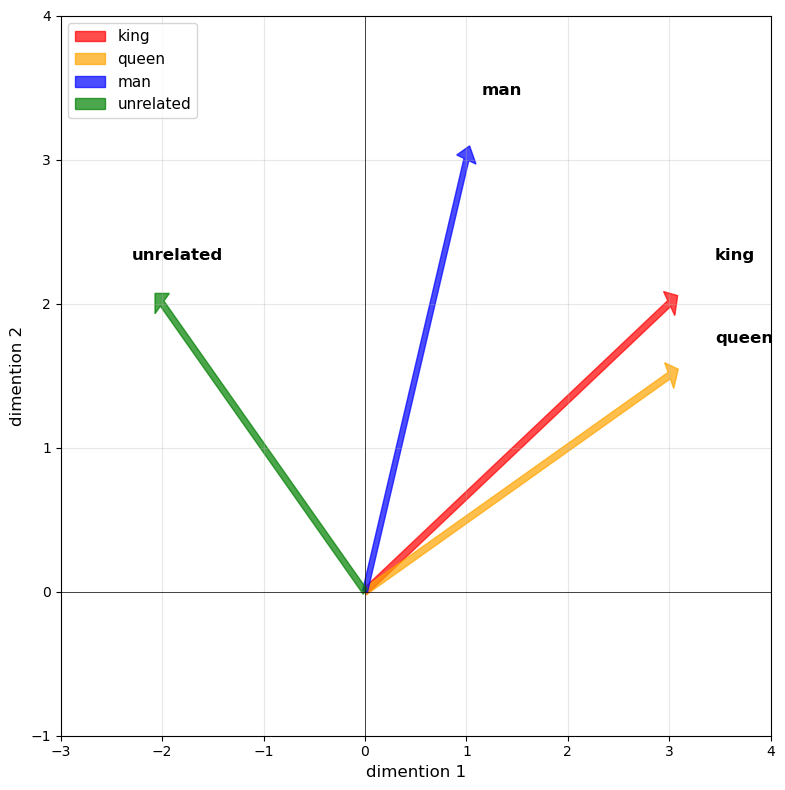


 관찰:
- king과 queen: 유사한 방향 → 높은 유사도
- king과 unrelated: 거의 수직 → 낮은 유사도


In [13]:
import numpy as np
import matplotlib.pyplot as plt
def cosine_similarity(v1, v2):
    """코사인 유사도 계산"""
    dot_product = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)  # 벡터의 크기(길이, norm) 계산 
    norm2 = np.linalg.norm(v2)
    return dot_product / (norm1 * norm2)

vectors = {
    "king": np.array([3.0, 2.0]),      # 상단 우측
    "queen": np.array([3.0, 1.5]),     # king과 유사한 방향
    "man": np.array([1.0, 3.0]),       # 다른 방향
    "unrelated": np.array([-2.0, 2.0]), # 거의 수직
}
# 모든쌍의 코사인 유사도 계산
print("\n 벡터 쌍 간의 코사인 유사도:")
words_list = list(vectors.keys())
for i, w1 in enumerate(words_list):
    for w2 in words_list[i+1:]:
        sim = cosine_similarity(vectors[w1], vectors[w2])
        print(f"{w1:12} vs {w2:12}: {sim:7.4f}")


# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'blue', 'green']
for (word, vec), color in zip(vectors.items(), colors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.2, head_length=0.1, 
             fc=color, ec=color, alpha=0.7, label=word, width=0.05)
    ax.text(vec[0]*1.15, vec[1]*1.15, word, fontsize=12, fontweight='bold')

ax.set_xlim(-3, 4)
ax.set_ylim(-1, 4)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('dimention 1', fontsize=12)
ax.set_ylabel('dimention 2', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

print("\n 관찰:")
print("- king과 queen: 유사한 방향 → 높은 유사도")
print("- king과 unrelated: 거의 수직 → 낮은 유사도")

In [ ]:
%conda install gensim

In [ ]:
# 단어를 의미가 반영된 벡터로 변환하는 알고리즘
import gensim.downloader as api
import numpy as np
# Glove모델 (50차원)
wv = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [19]:
test_word = 'man'
vec = wv[test_word]
print(f'단어 : {test_word}')
print(f'벡터 차원 : {len(vec)}')
print(f'벡터 (앞에서 10개) : {vec[:10]}')
print(f'벡터 타입 : {type(vec)}')
print(f'벡터 범위 : {vec.min():.4f}  {vec.max():.4f}')
# 모델정보
print(f'학습된 단어개수 {len(wv)}')
print(f'임베딩 차원 {wv.vector_size}')
print(f'모델의 종류 {type(wv)}')
# 유사한 단어 찾기
print(f'{test_word}와 유사한 상위 5개 단어')
similar_words =  wv.most_similar(test_word, topn=5)
similar_words

단어 : man
벡터 차원 : 50
벡터 (앞에서 10개) : [-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778 ]
벡터 타입 : <class 'numpy.ndarray'>
벡터 범위 : -2.8094  2.6124
학습된 단어개수 400000
임베딩 차원 50
모델의 종류 <class 'gensim.models.keyedvectors.KeyedVectors'>
man와 유사한 상위 5개 단어


[('woman', 0.8860337734222412),
 ('boy', 0.8564431071281433),
 ('another', 0.8452840447425842),
 ('old', 0.8372182250022888),
 ('one', 0.827606201171875)]